# In-depth Analysis of Retail Sales Data: Insights and Implications

The retail industry generates massive amounts of data every day from sales transactions and customer demographics to store operations and external factors like weather and economic indicators. Analyzing this data can yield valuable insights that help companies make data-driven decisions, improve performance and ultimately increase profits.

### Gathering the Data
We will explore a dataset that contains weekly sales data from different stores and departments over several years from 2010–2012. This data comes separated into three files and must be combined. The dataset includes a variety of attributes such as store size, type, the average temperature in the region, fuel price, promotional markdowns, consumer price index (CPI) and unemployment rate.

Find the dataset here https://www.kaggle.com/datasets/manjeetsingh/retaildataset

### Business Understanding — Asking the Right Questions
Some of the questions we aim to answer is how does store size relate to weekly sales and markdowns? Do sales vary significantly by store type and if so, how? Do external factors like unemployment rate and temperature have a significant impact on sales? It’s also important to know how the answers to these questions can be used to help a business or in this case a chain of retail stores improve and better serve their customers and we’ll be diving into that at the end.

### Assessing the Data
The data comes in three separate files and are showcased below with their title and the relevant data fields in each file:

##### Stores
Anonymized information regarding the 45 stores, indicating the type and size of store.

##### Features
Contains additional data related to the store, department, and regional activity for the given dates.

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week

##### Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales - sales for the given department in the given store
IsHoliday - whether the week is a special holiday week

### Data Preparation
First we want to take a look at the dataset variables and their data type. Different data types require different types of analysis. For instance, numerical variables can be summarized using measures such as mean, median, and standard deviation, while categorical variables can be summarized using frequency counts or proportions. Knowledge of data types can help identify errors in the dataset. For example, if a numeric field contains a non-numeric value, like a string or a missing value, this could indicate an issue with data collection or entry.

I brought in all three of the different files and showcased their data type as shown below:

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assigning the datasets to individual datasets for now

df = pd.read_csv('C:\\Users\\zz881\\Desktop\\Retail_Sales_Data\\sales data-set.csv')
df2 = pd.read_csv('C:\\Users\\zz881\\Desktop\\Retail_Sales_Data\\stores data-set.csv')
df3 = pd.read_csv('C:\\Users\\zz881\\Desktop\\Retail_Sales_Data\\Features data set.csv')

In [2]:
# Taking a look at the sales data

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [3]:
# Looking at the stores dataset

df2.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
# Looking at the different features

df3.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
print(df.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------       

In [6]:
 # Merging the three datasets into one
    
new_df=df.merge(df3)
combined_df=new_df.merge(df2)
combined_df=combined_df.fillna(0)
combined_df["Date"]=pd.to_datetime(combined_df["Date"])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

C:\Users\zz881\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\zz881\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\zz881\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\zz881\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/03/2010' in DD/MM/YYYY format. Provide format or specif

In [7]:
# Creating a Year Column in the dataset

combined_df['Date'] = pd.to_datetime(combined_df['Date'])


combined_df['Year'] = combined_df['Date'].dt.year

In [8]:
# It’s important to find an NA values in the dataset and manage them properly.
# Below we can see that there are no NA values in the dataset:

combined_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
dtype: int64

In [9]:
# Showcasing the breakout of the numeric values in combined dataset by common metrics

combined_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000


### Data Analysis
##### Correlation Analysis
Our first step is to conduct a correlation analysis to understand the relationships between different variables. This analysis revealed several interesting insights:

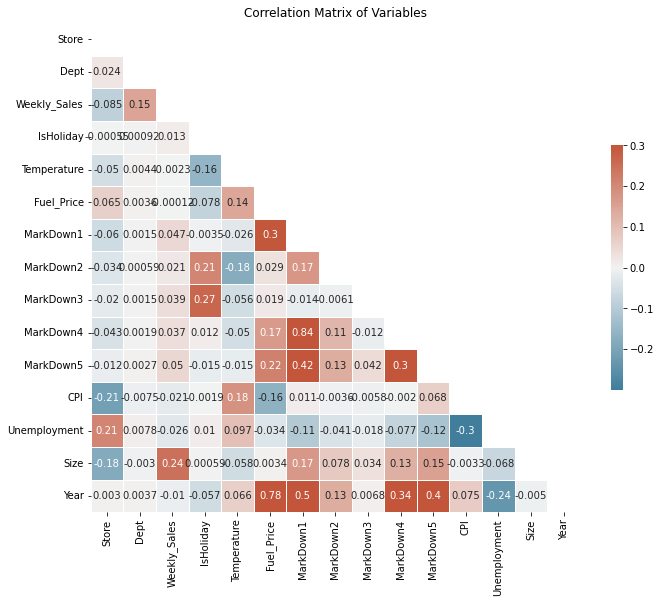

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_matrix(data):
        """
    Plots a correlation matrix for the given DataFrame.

    This function computes the correlation between all numerical variables in the DataFrame and visualizes the results as a heatmap. It provides an overview of the relationships between different variables, allowing for quick identification of potential patterns and associations.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data to be analyzed. It should consist of numerical variables for the correlation matrix.

    Returns:
        None: A heatmap plot of the correlation matrix is displayed.
    """
    
    # Using the correlation matrix to understand the relationship between different variables
    corr = combined_df.corr()

    # Generating mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Creating the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generating custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Using heatmap with mask 
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.title('Correlation Matrix of Variables')
    plt.show()
    
correlation_matrix(combined_df)

### Question 1:  How does store size relate to weekly sales and markdowns?

Markdowns, which represent promotional activities, showed a moderate positive correlation with store size suggesting that larger stores tend to run more promotions.

From the correlation matrix we can see that markdowns, which represent promotional activities, showed a moderate positive correlation with store size suggesting that larger stores tend to run more promotions.

Within the dataset the relationship between store size and markdowns seems to be the most non-obvious and interesting. Larger stores having more markdowns could be counterintuitive as one might expect larger stores to have better inventory management and thus fewer markdowns.

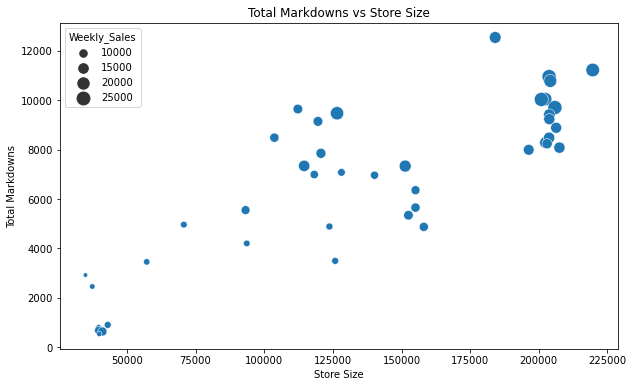

In [11]:
# Aggregating the data by store, getting average weekly sales, size, and markdown amounts
store_data = combined_df.groupby('Store').agg({'Weekly_Sales':'mean', 'Size':'mean', 
                                      'MarkDown1':'mean', 'MarkDown2':'mean',
                                      'MarkDown3':'mean', 'MarkDown4':'mean',
                                      'MarkDown5':'mean'}).reset_index()

# Creating a column for total markdowns
store_data['Total_MarkDown'] = store_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Size", y="Total_MarkDown", data=store_data, size="Weekly_Sales", sizes=(20, 200))
plt.title('Total Markdowns vs Store Size')
plt.xlabel('Store Size')
plt.ylabel('Total Markdowns')
plt.show()

This scatter plot illustrates the relationship between store size and total markdowns with each point scaled by average weekly sales. As we can see, larger stores tend to have more markdowns. One might assume this is due to larger stores having a wider variety of products and a higher sales volume which could lead to more promotional activities.

Moreover the size of the points represents the average weekly sales and it is noticeable that larger stores, which also have more markdowns, tend to have higher sales. This obviously suggests that markdowns are an effective strategy for boosting sales particularly in larger stores.

What isn't obvious is that while one might expect larger stores to have better inventory management and thus fewer markdowns, the data suggests the opposite. This could lead to other interesting ideas for insights such as looking into the effectiveness of markdowns on sales across different store sizes.

### Question 2: Do sales vary significantly by store type?

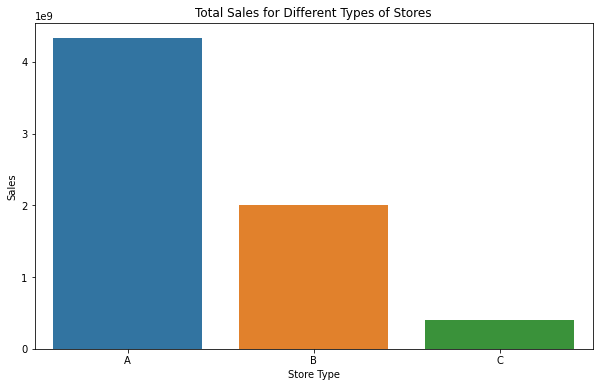

In [12]:
# Looking at the distribution of sales among different types of stores
sales_by_type = combined_df.groupby('Type').agg({'Weekly_Sales':'sum'}).reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x="Type", y="Weekly_Sales", data=sales_by_type)
plt.title('Total Sales for Different Types of Stores')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

* Our analysis shows us that sales varied significantly by store type. Store type ‘A’ had significantly higher total sales than store types ‘B’ and ‘C’. This could be due to factors such as the number of stores, store size, location, and customer preferences.

* From the correlation matrix we also saw that Store size had a positive correlation with weekly sales indicating that larger stores tend to have higher sales.

### Question 3: Do external factors like unemployment rate and temperature have a significant impact on sales?

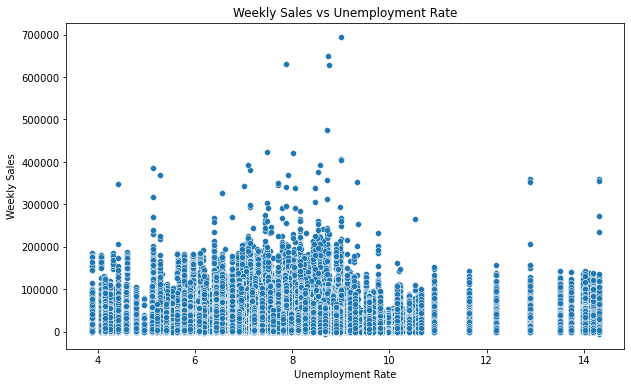

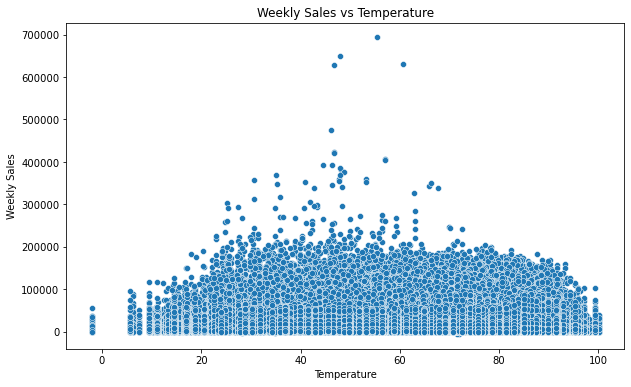

In [13]:
# Showing the effect of Unemployment Rate on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=combined_df)
plt.title('Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

# Showing what temperature's effect is on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=combined_df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

##### Effect of Unemployment Rate on Sales: 
* There doesn’t seem to be a clear relationship between the unemployment rate and weekly sales. This might suggest that sales are not heavily influenced by the unemployment rate or the effect varies across different stores and departments.

##### Temperature Effect on Sales: 
Similar to the unemployment rate there doesn’t seem to be a clear relationship between the temperature and weekly sales. The stores’ sales do not appear to be heavily influenced by the temperature.

### Other Interesting Finds

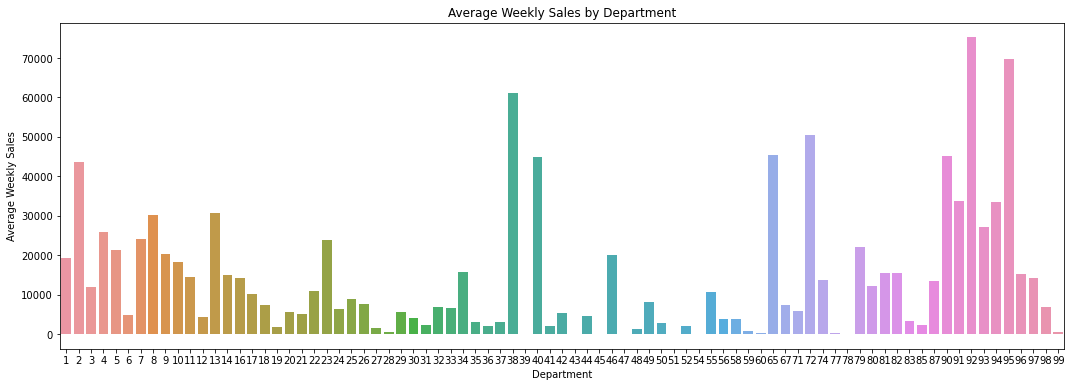

In [14]:
# Showingcasing Sales Performance by Department
dept_sales = df.groupby('Dept').agg({'Weekly_Sales':'mean'}).sort_values(by='Weekly_Sales', ascending=False).reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(x="Dept", y="Weekly_Sales", data=dept_sales)
plt.title('Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.show()

##### Sales Performance by Department: 
Some departments (like department 92, 95, 38, etc.) are significantly outperforming others in terms of average weekly sales. This suggests that these departments might be carrying the most popular or profitable items.

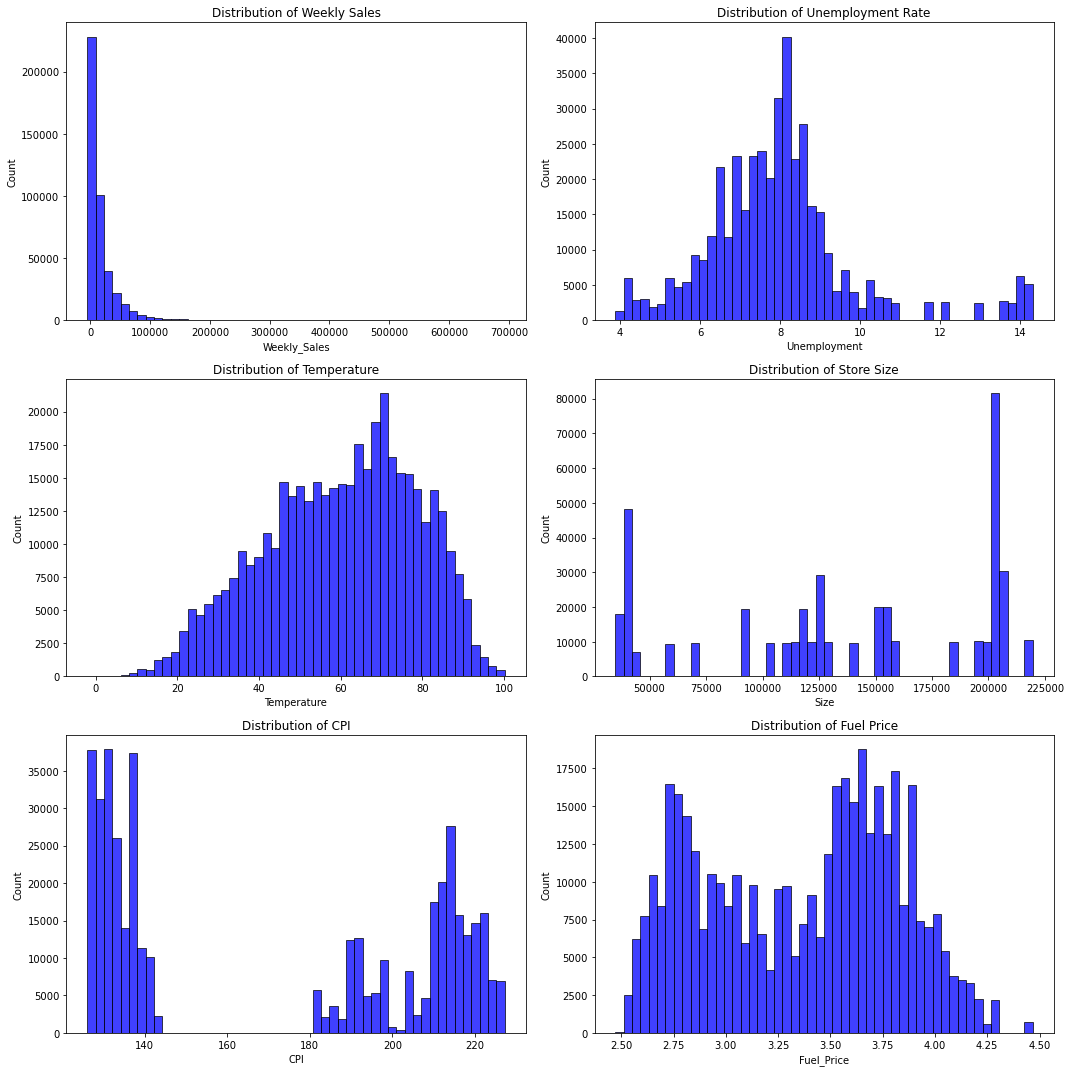

In [15]:
# Plotting histogram charts for certain key variables such as Weekly_Sales', 'Unemployment', 
#'Temperature', 'Size', 'CPI', and 'Fuel_Price'. For 'Type' and 'IsHoliday'

# Creating the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 15))

# Showing the histogram for 'Weekly_Sales'
sns.histplot(combined_df['Weekly_Sales'], bins=50, kde=False, color="b", ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Weekly Sales')

# Showing the histogram for 'Unemployment'
sns.histplot(combined_df['Unemployment'], bins=50, kde=False, color="b", ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Unemployment Rate')

# Showing the histogram for 'Temperature'
sns.histplot(combined_df['Temperature'], bins=50, kde=False, color="b", ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Temperature')

# Showing the histogram for 'Size'
sns.histplot(combined_df['Size'], bins=50, kde=False, color="b", ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Store Size')

# Showing the histogram for 'CPI'
sns.histplot(combined_df['CPI'], bins=50, kde=False, color="b", ax=axes[2, 0])
axes[2, 0].set_title('Distribution of CPI')

# Showing the histogram for 'Fuel_Price'
sns.histplot(combined_df['Fuel_Price'], bins=50, kde=False, color="b", ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Fuel Price')

plt.tight_layout()
plt.show()

##### Weekly Sales: 
The distribution of weekly sales is heavily skewed to the right indicating that most of the weekly sales amounts are relatively low with a few instances of very high sales.

##### Unemployment Rate: 
The distribution of the unemployment rate shows a somewhat bimodal distribution indicating two groups of unemployment rate levels.

##### Temperature: 
The temperature distribution is somewhat bimodal reflecting the changing seasons over a year.

##### Store Size: 
The store size distribution appears to be multi-modal, which suggests the presence of different groups of store sizes.

##### CPI (Consumer Price Index): 
The distribution of CPI is multi-modal indicating different periods of economic conditions.

##### Fuel Price: 
The distribution of fuel prices shows a somewhat uniform distribution showing that the fuel prices are well spread out over time.

## Conclusion

#### Questions Answered
Through this exploratory data analysis we uncovered several interesting insights on our questions regarding retail sales. We have discovered that larger stores tend to have higher sales and run more promotions. Sales do in fact vary by store type and tend to increase during holidays and at the end of the year. Some departments significantly outperform others while factors like unemployment rate and temperature do not seem to have a significant impact on sales. This answers our three questions that we had at the beginning of this analysis.

These insights can help retailers make informed decisions about store operations, inventory management, and promotional activities. By focusing on high-performing departments and understanding the seasonal trends in sales retailers can optimize their operations for maximum profitability.

#### Next Steps
While we were able to uncover some insightful trends and correlations there are still many other aspects of this data that could be explored. For example, how do specific departments contribute to overall sales? Are there differences in sales patterns between different regions? How does the combination of different markdowns affect sales?

Going forward this dataset could serve as an excellent basis for building a machine learning model to predict future sales. The wide variety of features would allow for the training of a robust model, and the high granularity of the data (weekly sales) would enable accurate and detailed forecasts. This could be a powerful tool for helping retailers plan and optimize their operations.

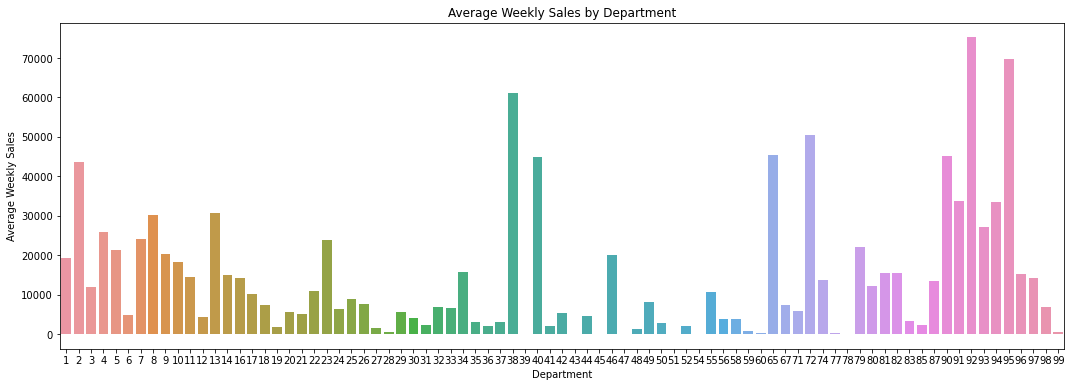

In [18]:
def plot_avg_weekly_sales_by_department(df):
    # Group by department and calculate the average weekly sales
    dept_sales = df.groupby('Dept').agg({'Weekly_Sales': 'mean'}).sort_values(by='Weekly_Sales', ascending=False).reset_index()

    # Plot the bar chart
    plt.figure(figsize=(18, 6))
    sns.barplot(x="Dept", y="Weekly_Sales", data=dept_sales)
    plt.title('Average Weekly Sales by Department')
    plt.xlabel('Department')
    plt.ylabel('Average Weekly Sales')
    plt.show()

plot_avg_weekly_sales_by_department(df)